# Supervised learning

# A. CLASSIFICATION

In [125]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve, confusion_matrix, f1_score, classification_report,auc,r2_score, mean_absolute_error,mean_squared_error

In [126]:
import pandas as pd
import numpy as np

cleand= pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\capstone project\omsicc.csv")
cleand.head()

,Age,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Sex
0,37,Unknown,No,Yes,Often,15,No,Yes,Yes,Not sure,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,Unknown,No,No,Rarely,1250,No,No,Don't know,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Unknown,No,No,Rarely,15,No,Yes,No,No,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,Unknown,Yes,Yes,Often,63,No,Yes,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,Unknown,No,No,Never,300,Yes,Yes,Yes,No,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male


# Logistic Regression

In [127]:
X = cleand[['Sex', 'Age','seek_help','work_interfere','family_history','benefits','care_options','leave','wellness_program','coworkers', 'supervisor','mental_health_interview','mental_health_consequence']]
y = cleand['treatment']

In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

log = LogisticRegression(max_iter=1000, random_state=42)

numeric_features = ['Age']
categorical_features = ['Sex','seek_help','work_interfere','family_history','benefits','care_options','leave','wellness_program','coworkers', 'supervisor','mental_health_interview','mental_health_consequence']


numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', log)
])
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],   
    'classifier__penalty': ['l2'],              
    'classifier__solver': ['lbfgs', 'liblinear']
}

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)
print("Test set accuracy:", grid_search.score(X_test, y_test))

y_pred = grid_search.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Weighted):", f1)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Best cross-validation accuracy: 0.8339622641509434
Test set accuracy: 0.8093841642228738
F1 Score (Weighted): 0.8079468757860767
Confusion Matrix:
 [[123  47]
 [ 18 153]]

Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.72      0.79       170
         Yes       0.77      0.89      0.82       171

    accuracy                           0.81       341
   macro avg       0.82      0.81      0.81       341
weighted avg       0.82      0.81      0.81       341



Confusion Matrix:
 [[123  47]
 [ 18 153]]


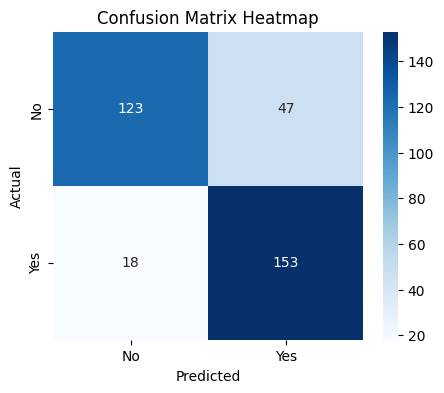

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=grid_search.classes_, 
            yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [131]:
cleand.columns

Index(['Age', 'self_employed', 'family_history', 'treatment', 'work_interfere',
       'no_employees', 'remote_work', 'tech_company', 'benefits',
       'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'Sex'],
      dtype='object')

# Random Forest

In [132]:
numeric_features = ['Age']
categorical_features = [
    'Sex', 'wellness_program', 'seek_help', 'leave',
    'mental_health_consequence', 'family_history', 'work_interfere', 'care_options'
]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

rf = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', rf)
])

param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)
print("Test Accuracy:", grid_search.score(X_test, y_test))

y_pred = grid_search.predict(X_test)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score (Weighted):", f1)


cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Best CV Accuracy: 0.8427672955974843
Test Accuracy: 0.8299120234604106
F1 Score (Weighted): 0.8285403462302525
Confusion Matrix:
 [[126  44]
 [ 14 157]]

Classification Report:
               precision    recall  f1-score   support

          No       0.90      0.74      0.81       170
         Yes       0.78      0.92      0.84       171

    accuracy                           0.83       341
   macro avg       0.84      0.83      0.83       341
weighted avg       0.84      0.83      0.83       341



ROC AUC Score: 0.8960612315101479


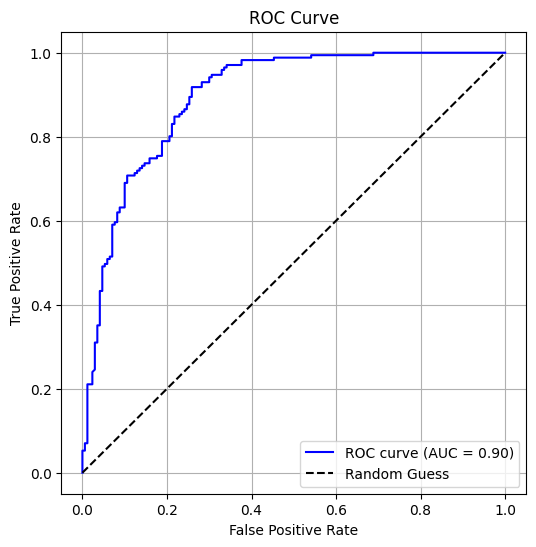

In [133]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve, auc

if len(y.unique()) == 2:
    y_prob = grid_search.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    print("ROC AUC Score:", roc_auc)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label="Yes")
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

else:
    y_bin = label_binarize(y_test, classes=grid_search.classes_)
    y_prob = grid_search.predict_proba(X_test)
    roc_auc = roc_auc_score(y_bin, y_prob, average='weighted', multi_class='ovr')
    print("Weighted ROC AUC Score (OVR):", roc_auc)

    plt.figure(figsize=(7, 7))
    for i, class_label in enumerate(grid_search.classes_):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob[:, i])
        plt.plot(fpr, tpr, label=f'Class {class_label} (AUC = {auc(fpr, tpr):.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multi-Class ROC Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()



Confusion Matrix:
 [[126  44]
 [ 14 157]]


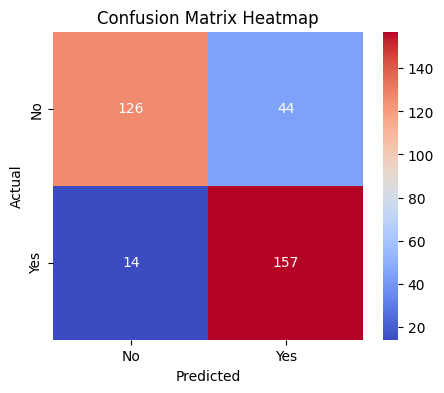

In [134]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", 
            xticklabels=grid_search.classes_, 
            yticklabels=grid_search.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()


# XGBOOST

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [00:58:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.8123167155425219
F1 Score: 0.8279569892473119
ROC AUC Score: 0.8847609219126247


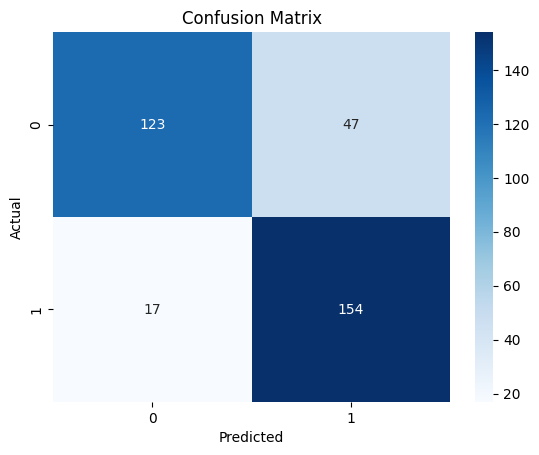

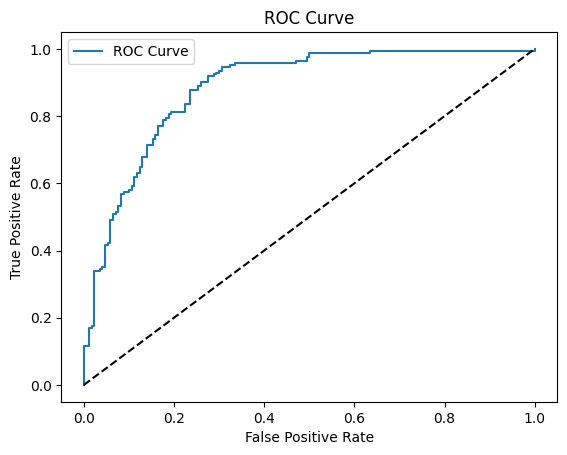

In [135]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


cleand = cleand.dropna(subset=['treatment'])  


label_encoders = {}
for col in cleand.columns:
    if cleand[col].dtype == 'object':
        le = LabelEncoder()
        cleand[col] = le.fit_transform(cleand[col].astype(str))
        label_encoders[col] = le


X = cleand.drop('treatment', axis=1)
y = cleand['treatment']


X = X.fillna(0) 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.03,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)


xgb_clf.fit(X_train, y_train)


y_pred = xgb_clf.predict(X_test)
y_prob = xgb_clf.predict_proba(X_test)[:, 1]


print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


# REGRESSION

# Linear Regression

In [136]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
X = cleand.drop(columns=["Age"])
y = cleand["Age"]


numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(exclude=['number']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=48
)


pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} years")
print(f"R² Score: {r2:.4f}")


MSE: 27.79
RMSE: 5.27 years
R² Score: 0.0932


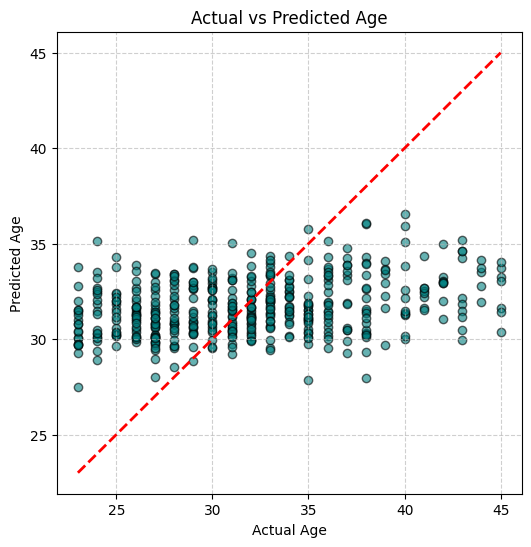

In [137]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="teal", edgecolors="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # perfect prediction line
plt.xlabel("Actual Age")
plt.ylabel("Predicted Age")
plt.title("Actual vs Predicted Age")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Elastic Net

In [138]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(max_iter=10000))
])
param_grid = {
    'regressor__alpha': [0.01, 0.1, 1, 10,],
    'regressor__l1_ratio': [0.1, 0.5, 0.9,]
}

grid_search = GridSearchCV(
    pipeline, param_grid, cv=20,
    scoring='r2', n_jobs=-1
)

grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)


print("Best Parameters:", grid_search.best_params_)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} years")
print(f"R² Score: {r2:.4f}")

Best Parameters: {'regressor__alpha': 1, 'regressor__l1_ratio': 0.1}
MSE: 28.93
RMSE: 5.38 years
R² Score: 0.0562


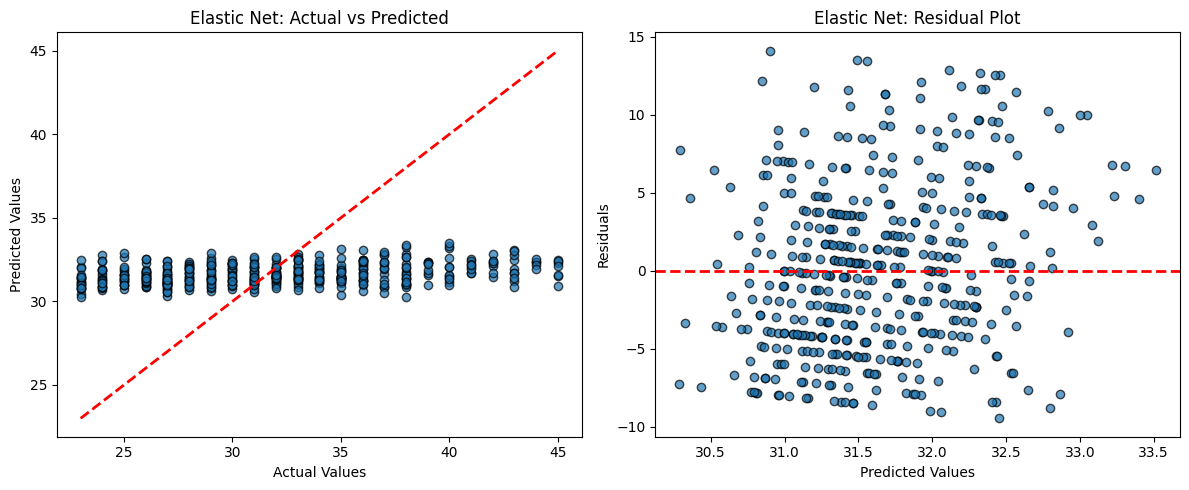

In [139]:
residuals = y_test - y_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic Net: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Elastic Net: Residual Plot")

plt.tight_layout()
plt.show()

# Categorical boosting 

In [140]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from catboost import Pool
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(verbose=0, random_state=42))
])
param_grid = {
    'regressor__depth': [4, 6, 8, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'regressor__iterations': [1000, 2000, 3000],
    'regressor__l2_leaf_reg': [1, 3, 5, 7]  
}
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=70,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
y_pred = random_search.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f} years")
print(f"R² Score: {r2:.4f}")

MSE: 27.66
RMSE: 5.26 years
R² Score: 0.0976


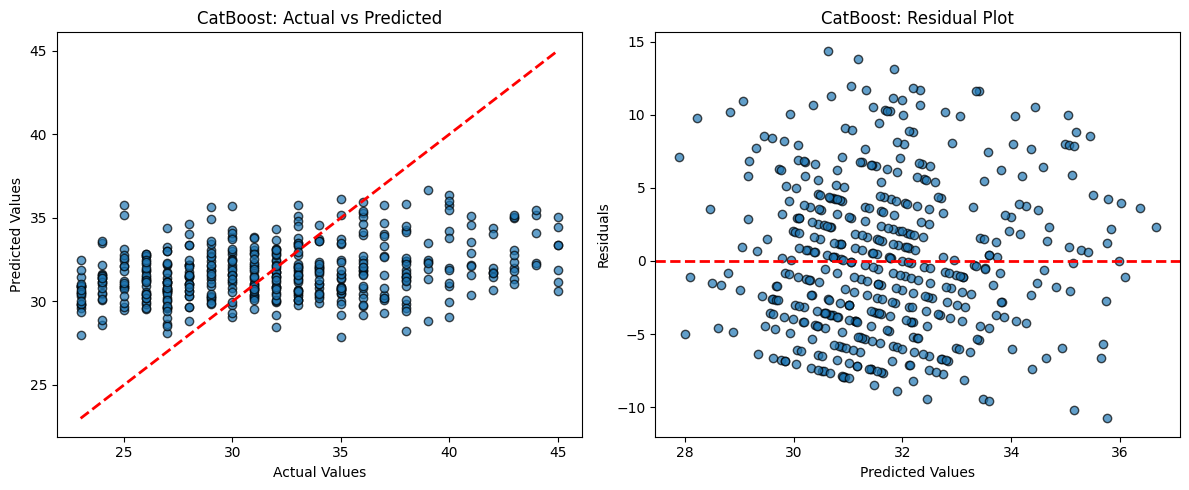

In [141]:
residuals = y_test - y_pred
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("CatBoost: Actual vs Predicted")

plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals, alpha=0.7, edgecolors='k')
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("CatBoost: Residual Plot")

plt.tight_layout()
plt.show()